In [1]:
import pandas as pd

import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame, Panel
from collections import Counter
from operator import truediv
from itertools import chain
import re


In [2]:
from sklearn.preprocessing import OneHotEncoder

from scipy import sparse

import scipy.sparse as sp

from sklearn.cross_validation import train_test_split


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
raw_articles = pd.read_csv(
    '../data/raw/201705-20170614_ap_articles.csv', 
    )

In [10]:
impressions = pd.read_csv(
    '../data/raw/20170601_joined_impressions.csv.gz', sep=',', compression='gzip')
#     names=['experiment', 'variant', 'userId', 'environmentId', 'frontPageViewId', 'contentPosition',
#            'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
#            'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
#     usecols=['environmentId', 'frontPageViewId', 'contentPosition',
#            'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
#            'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
#     parse_dates=['impressionTimestamp', 'clickTimestamp'])


In [12]:
impressions

,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked
0,NaN,0,2017-06-01T18:17:27+00:00,3AyoA,NaN,NaN,0
1,0000051c-784a-4103-a30e-61c743218977,8,2017-06-01T15:09:23+00:00,26r1x,NaN,NaN,0
2,0000051c-784a-4103-a30e-61c743218977,9,2017-06-01T15:09:21+00:00,yAAMA,NaN,NaN,0
3,0000051c-784a-4103-a30e-61c743218977,10,2017-06-01T15:09:21+00:00,vRLqm,NaN,NaN,0
4,0000051c-784a-4103-a30e-61c743218977,11,2017-06-01T15:09:35+00:00,OxdE3,NaN,NaN,0
5,0000051c-784a-4103-a30e-61c743218977,12,2017-06-01T15:09:37+00:00,VA4Mr,NaN,NaN,0
6,0000051c-784a-4103-a30e-61c743218977,13,2017-06-01T15:09:37+00:00,OKKXk,NaN,NaN,0
7,0000051c-784a-4103-a30e-61c743218977,14,2017-06-01T15:09:39+00:00,VAA36,NaN,NaN,0
8,0000051c-784a-4103-a30e-61c743218977,15,2017-06-01T15:09:43+00:00,97Rmr,301bec19-12c3-45c1-afca-f14494d51a5e,2017-06-01T15:09:53+00:00,1
9,00001212-9021-41c4-8280-95712083b45b,0,2017-06-01T20:56:59+00:00,MyKpE,NaN,NaN,0


In [13]:
def removingmissingdata(df):
    #df = df.dropna()
    df = df.fillna(0)
    df = df[df["frontPageViewId"] != 0]
    df = df[df["contentId"] != 0]
 
    df['time_hour'] = df.clickTimestamp.apply(lambda x: x.hour)
    return df

In [14]:
df = removingmissingdata(impressions)

AttributeError: 'int' object has no attribute 'hour'

In [7]:
def processtag(train):
    r = '[[\\]]'
    newtags = train.tags.apply(lambda x:re.sub(r,'',x))
    train["tags"] = newtags.str.split(',')
    newcategory = train.categories.apply(lambda x:re.sub(r,'',x))
    newcategory = newcategory.str.split(',')
    train["categories"] = pd.DataFrame({'category':newcategory, 'tag':newtags})
    return train

In [8]:
articles = processtag(raw_articles)
articles

,id,body,capi-id,categories,content-type,content-type-short,created,hotness,image-url,last-modified,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,0Rrg6,Etter helgens Premier League-runde er det fire...,234850,[fotball],news,news,2017-05-01T07:18:03.000Z,40,https://vertical.snd.no/images/38c6a0c9-64c3-4...,2017-05-01T08:56:02.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Den...,2017-05-01T08:30:13.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[manchester city, engelsk fotball, mancheste...",Den tette kampen mellom Guardiola og Klopp kan...
1,0Rr7G,Også denne sesongen har Lionel Messi bøttet in...,234868,[fotball],news,news,2017-05-01T15:16:34.000Z,40,https://vertical.snd.no/images/ba027d24-cee0-4...,2017-05-01T17:26:51.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Bil...,2017-05-01T17:22:22.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[lionel messi, teheran, barcelona, argentin...",Bildene av Messis dobbeltgjenger går verden ru...
2,1lrJl,Sarpsborg-Rosenborg 1–2 \n– Det blir den klass...,234881,[fotball],news,news,2017-05-01T19:54:36.000Z,40,https://vertical.snd.no/images/6abc8680-05af-4...,2017-05-01T20:52:37.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Fo...,2017-05-01T20:52:37.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[eliteserien, sarpsborg 08, rosenborg bk]",– For fem år siden hadde jeg sikkert gravd meg...
3,1lr9e,"Hamas-leder Khaled Meshaal, som bor i eksil i ...",620268,[verden],news,news,2017-05-01T18:38:32.000Z,30,https://ap.mnocdn.no/images/afb62071-4c86-4a1c...,2017-05-01T18:42:25.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Hamas-vil-ikk...,2017-05-01T18:38:32.000Z,http://www.aftenposten.no/article/ap-620268b.html,ap,bench,published,[],Hamas vil ikke lenger kreve at Israel skal uts...
4,0RrOJ,Hoppsjef Clas Brede Bråthen har sagt til NTB a...,234859,[vintersport],news,news,2017-05-01T11:16:31.000Z,30,https://vertical.snd.no/images/259a16bf-c2cd-4...,2017-05-01T11:18:40.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/vintersport...,2017-05-01T11:18:23.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[hopp, holmenkollen, fis]",Skiforbundet vil ikke flytte Kollensøndagen
5,0RWrJ,Siv Jensen tar imot Aftenposten på møterommet ...,620160,"[norge, politikk]",news,news,2017-04-28T16:46:11.000Z,60,https://ap.mnocdn.no/images/edda47a8-6b1d-45c2...,2017-05-01T18:45:07.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/---De...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-620160b.html,ap,bench,published,"[siv jensen, stortingsvalg 2017, fremskritts...",- Det er ganske kjedelig i lengden når hvert ...
6,0Rr8A,Underholdning er ikke mangelvare i den ustabil...,234883,[fotball],news,news,2017-05-01T20:36:45.000Z,30,https://vertical.snd.no/images/8684374e-bde7-4...,2017-05-01T21:06:04.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Mi...,2017-05-01T21:06:04.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[mushaga bakenga, tore reginiussen, sarpsbor...",Minner mer og mer om Erik Hamréns RBK
7,1aK7e,– 2016 var året USA og Storbritannia våknet op...,618629,[verden],news,news,2017-04-04T15:36:49.000Z,60,https://ap.mnocdn.no/images/8a59f5df-bd5a-43e6...,2017-05-01T21:07:21.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Trumps-seier-...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-618629b.html,ap,bench,published,"[marine le pen, donald trump, presidentvalge...",Trumps seier har ikke løftet protestpartiene i...
8,26oea,Alexander Kristoff (29) klinket till og vant E...,234874,[sykkel],news,news,2017-05-01T16:48:59.000Z,40,https://vertical.snd.no/ima

### category

### MERGE TWO DATASET AND SAMPLE DATA

In [274]:
rich_impressions = df.merge(articles, left_on='contentId', right_on='id')

In [275]:
rich_impressions = rich_impressions.sample(frac=0.1).reset_index()

del rich_impressions["index"]
print(rich_impressions.shape)
rich_impressions.head()

(552366, 38)


,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,138c31ec-2c87-4814-bab3-61c61dbd96aa,8b5f153d-a960-46d5-8324-16c245d9bf92,7.0,2017-06-02 19:28:20,azVjL,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/osloby/Stemte-for-a-...,2017-06-01T19:30:00.000Z,http://www.aftenposten.no/article/ap-622191b.html,ap,bench,published,"[bystyret, bjørnar moxnes, byutvikling]","Stemte for å skjerme villastrøk i fjor, vil ik..."
1,89f9d504-ca23-4e06-b833-bf3546e3684b,6f8b7d5b-1fa0-4dd4-8272-425132896380,57.0,2017-06-02 14:41:39,6ObjO,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/reise/Skal-du-reise-...,2017-06-01T14:17:13.000Z,http://www.aftenposten.no/article/riks-10224b....,riks,bench,published,"[eøs, reise, forbrukerrettigheter, reisefor...",Skal du reise i sommer? Husk dette kortet.
2,8e180629-af88-443f-8818-b2bd7e587b77,7dc5b4fc-95e3-4156-a8fa-5d089aee1bb3,27.0,2017-06-02 13:56:31,JmzMR,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Kraftige-reak...,2017-06-01T20:11:16.000Z,http://www.aftenposten.no/article/ap-622392b.html,ap,bench,published,"[parisavtalen, donald trump, barack obama, ...",Kraftige reaksjoner fra hele verden: – Han erk...
3,351c3a37-aa5f-4768-9e62-bc153d9c1cbf,21803213-fcb1-434a-8b7c-f85671a8af4d,28.0,2017-06-02 23:04:36,6O7Er,0,1970-01-01,0.0,0,0.0,...,closed,subscription,http://www.aftenposten.no/amagasinet/Ingvild-T...,2017-06-01T12:33:17.000Z,http://www.aftenposten.no/article/ap-621395b.html,ap,bench,published,"[ingvild tennfjord, vin]",Ingvild Tennfjord: Klisjeene styrer markedsfør...
4,764dd77e-081f-4bff-bc31-5fd614e355ca,6a8dd03c-8dd2-417e-bdf8-58376a8dda40,34.0,2017-06-02 12:12:16,AKk4n,0,1970-01-01,0.0,0,0.0,...,closed,subscription,http://www.aftenposten.no/osloby/Aftenposten-h...,2017-05-27T07:12:49.000Z,http://www.aftenposten.no/article/ap-620783b.html,ap,bench,published,"[flyplass, pasta, restaurantanmeldelse, gar...",Aftenposten har testet mattilbudet på Oslo Luf...


In [276]:
rich_impressions.columns

Index(['environmentId', 'frontPageViewId', 'contentPosition',
       'impressionTimestamp', 'contentId', 'clickedPageViewId',
       'clickTimestamp', 'IsClicked', 'contentPageViewId',
       'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition',
       'contentWordCount', 'time_hour', 'id', 'body', 'capi-id', 'categories',
       'content-type', 'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title'],
      dtype='object')

In [12]:
flat_impressions = pd.DataFrame(
    data=[(index, category)
         for index, row in rich_impressions.iterrows()
         for category in row.categories],
    columns=['index', 'category']).set_index('index')

In [15]:
print(flat_impressions.shape)
flat_impressions.head()

(635163, 1)


,category
index,
0,fotball
1,norge
1,politikk
2,fotball
3,bolig


### the function of multitag onehot encoding

In [16]:
from sklearn.preprocessing import LabelEncoder  


def feature_matrix(rich_impressions, column_name):
    
    category_encoder = LabelEncoder()

    rich_impressions = rich_impressions.assign(encoded_column=lambda df: category_encoder.fit_transform(df[column_name]))

    row_indexes = rich_impressions.index.values    
    column_indexes = rich_impressions.encoded_column.values
    
    output = sparse.coo_matrix(
        (np.ones_like(column_indexes), 
        (row_indexes, column_indexes)))    
    
    return output
    

In [17]:
X_category = feature_matrix(flat_impressions, column_name='category')

In [18]:
X_category

<552366x31 sparse matrix of type '<class 'numpy.int64'>'
	with 635163 stored elements in COOrdinate format>

In [19]:
flat_impressions.columns

Index(['category'], dtype='object')

### logistic with position

In [20]:
from sklearn.preprocessing import OneHotEncoder

def singletag(mergedate, name):
    
    enc = OneHotEncoder()

    X = enc.fit_transform(mergedate[[name]].values)
    
    #result = X.toarray()
    
    return X
    

In [23]:
hotness = singletag(rich_impressions, 'hotness')

In [24]:
x_position = singletag(rich_impressions, "contentPosition")

In [25]:
x_position

<552366x126 sparse matrix of type '<class 'numpy.float64'>'
	with 552366 stored elements in Compressed Sparse Row format>

### recency 

In [193]:
rich_impressions = rich_impressions.assign(recency=rich_impressions.impressionTimestamp - pd.to_datetime(rich_impressions.published))

rich_impressions.recency.dt.total_seconds().head()
# histogram?
recency = rich_impressions.recency.dt.total_seconds()

0     75716.0
1     12531.0
2     10020.0
3    784354.0
4     22730.0
Name: recency, dtype: float64

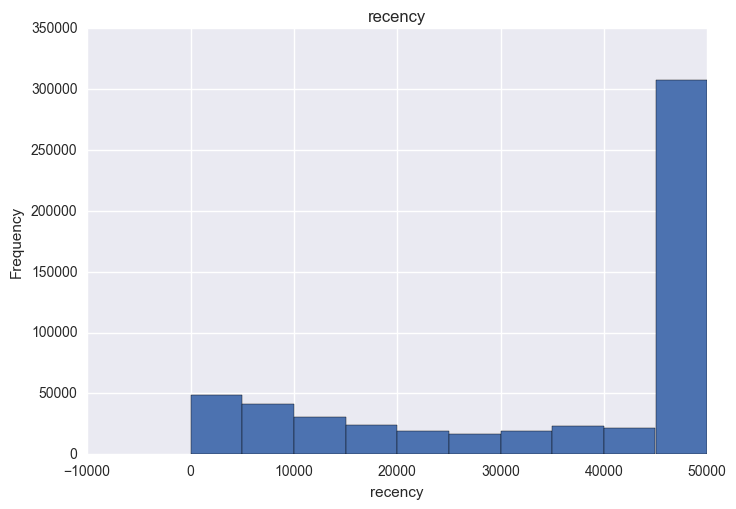

In [170]:
plt.hist(recency.recency, bins=np.arange(-5000, 55000, 5000))
plt.title("recency")
plt.xlabel("recency")
plt.ylabel("Frequency")

plt.show()

In [195]:
recency = recency.to_frame()

In [226]:
recency.recency[recency.recency <= 0] = -5000

recency.recency[recency.recency > 50000] = 52000

labels = [0] + list(range(1, 10)) + [10]

recency['group'] = pd.cut(recency.recency, [-100000000000] + list(range(0, 50000, 5000)) + [5500000], right=False, labels=labels)

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [232]:

x_recency = singletag(recency, 'group')

### tag

In [242]:
flat_impressions = pd.DataFrame(
    data=[(index, tags)
         for index, row in rich_impressions.iterrows()
         for tags in row.tags],
    columns=['index', 'tags']).set_index('index')

In [243]:
x_tag = feature_matrix(flat_impressions, column_name='tags')

### lifetime

In [278]:
x_lifetime = singletag(rich_impressions, 'lifetime')

### try to combine the feature

In [245]:
Y =rich_impressions[["IsClicked"]].values

In [244]:
newx = sp.hstack((X_category, x_position, hotness, x_recency, x_tag), format='csr')

In [251]:
X_train, X_test, y_train, y_test = train_test_split(
     newx, Y, test_size=0.33, random_state=42)

### do the prediction

In [252]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

prep = lr.predict_proba(X_test)


/Users/XiHUANG/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


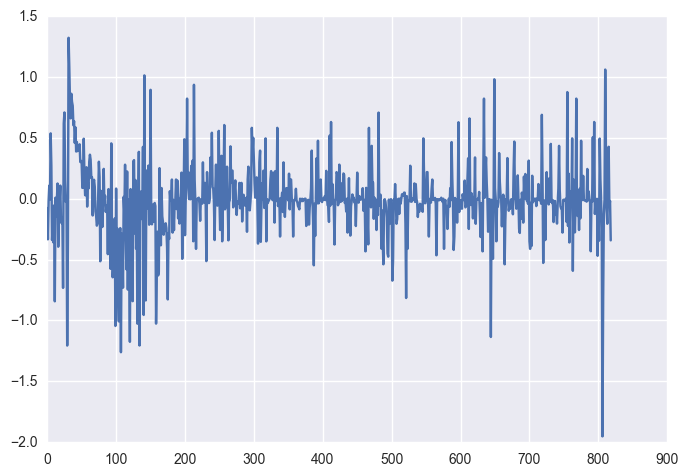

In [253]:
plt.plot(lr.coef_[0])

plt.show()


### Do the accuracy metrix

In [254]:
import numpy as np

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, prep[:, 1])

print(metrics.auc(fpr, tpr))



0.723585769999


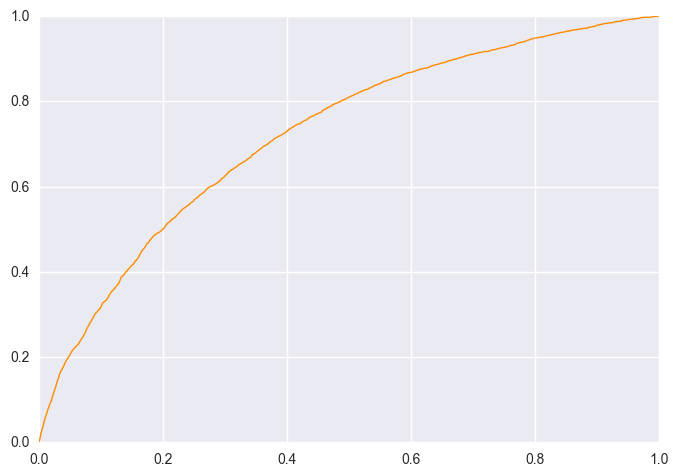

In [255]:
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))

plt.show()
